In [1]:
import pandas as pd   # 导入数据框处理工具包

import datetime      # 导入处理时间工具包

import matplotlib.pyplot as plt       # 导入matplotlib工具包中绘图函数pyplot
%matplotlib inline
plt.style.use('ggplot') # 选择画图风格
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

import warnings         # 忽略警告提示
warnings.filterwarnings('ignore')

from pylab import mpl    
mpl.rcParams['axes.unicode_minus'] = False    # 解决保存图像中负号‘-’显示为方块的问题

In [2]:
trip = pd.read_csv("CycleShareDataset/trip.csv",error_bad_lines=False, encoding = 'utf8', sep = ',')
weather = pd.read_csv("CycleShareDataset/weather.csv",error_bad_lines=False, encoding = 'utf8', sep = ',')

b'Skipping line 50794: expected 12 fields, saw 20\n'


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          688 non-null    float64
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [4]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286857 non-null  int64  
 1   starttime          286857 non-null  object 
 2   stoptime           286857 non-null  object 
 3   bikeid             286857 non-null  object 
 4   tripduration       286857 non-null  float64
 5   from_station_name  286857 non-null  object 
 6   to_station_name    286857 non-null  object 
 7   from_station_id    286857 non-null  object 
 8   to_station_id      286857 non-null  object 
 9   usertype           286857 non-null  object 
 10  gender             181557 non-null  object 
 11  birthyear          181553 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [5]:
weather.drop(['Max_Temperature_F','Min_TemperatureF',
              'Max_Dew_Point_F','Min_Dewpoint_F',
              'Max_Humidity','Min_Humidity',
              'Max_Sea_Level_Pressure_In','Min_Sea_Level_Pressure_In',
              'Max_Visibility_Miles','Min_Visibility_Miles',
              'Max_Wind_Speed_MPH','Max_Gust_Speed_MPH','Events'],axis = 1,inplace = True)

weather.rename(columns = {'Mean_Temperature_F':'Temperature',
                          'MeanDew_Point_F':'Dew_Point','Mean_Humidity':'humidity',     
                          'Mean_Sea_Level_Pressure_In':'Sea_Pressure',
                          'Mean_Visibility_Miles':'Visibility_Miles',
                          'Mean_Wind_Speed_MPH':'Wind_Speed'},inplace = True)

trip.drop(['tripduration','from_station_name','to_station_name',
           'bikeid','from_station_id','to_station_id'],axis = 1,inplace = True)

In [8]:
 #  转换为时间序列
trip['starttime'] = pd.to_datetime(trip.starttime)
trip['stoptime'] = pd.to_datetime(trip.stoptime)
weather['Date'] = pd.to_datetime(weather.Date)
 #  创建新的字段
trip['date'] = trip.starttime.astype('datetime64[D]')
trip['year'] = trip.date.apply(lambda x: x.year)
trip['month'] = trip.date.apply(lambda x: x.month)
trip['day'] = trip.date.apply(lambda x: x.day)
trip['hour'] = trip.starttime.apply(lambda x: x.hour)
trip['weekday'] = trip.starttime.apply(lambda x: x.weekday())

In [7]:
trip.head(3)

,trip_id,starttime,stoptime,usertype,gender,birthyear,date,year,month,day,hour,weekday
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,Member,Male,1960.0,2014-10-13,2014,10,13,10,0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,Member,Male,1970.0,2014-10-13,2014,10,13,10,0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,Member,Female,1988.0,2014-10-13,2014,10,13,10,0


In [9]:
groupby_age = trip.dropna()
groupby_age['birthyear'] = groupby_age.birthyear.astype('int64')

def func(x):
    if x > 1996:
        return '0-20'
    elif 1986 < x <= 1996:
        return '20-30'
    elif 1976 < x <= 1986:
        return '30-40'
    elif 1966 < x <= 1976:
        return '40-50'
    elif 1956 < x <= 1966:
        return '50-60'
    else :
        return '60+'

groupby_age['age'] = groupby_age.birthyear.apply(func)

In [10]:
groupby_age.head(3)

,trip_id,starttime,stoptime,usertype,gender,birthyear,date,year,month,day,hour,weekday,age
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,Member,Male,1960,2014-10-13,2014,10,13,10,0,50-60
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,Member,Male,1970,2014-10-13,2014,10,13,10,0,40-50
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,Member,Female,1988,2014-10-13,2014,10,13,10,0,20-30


Text(0.5, 0, '图3')

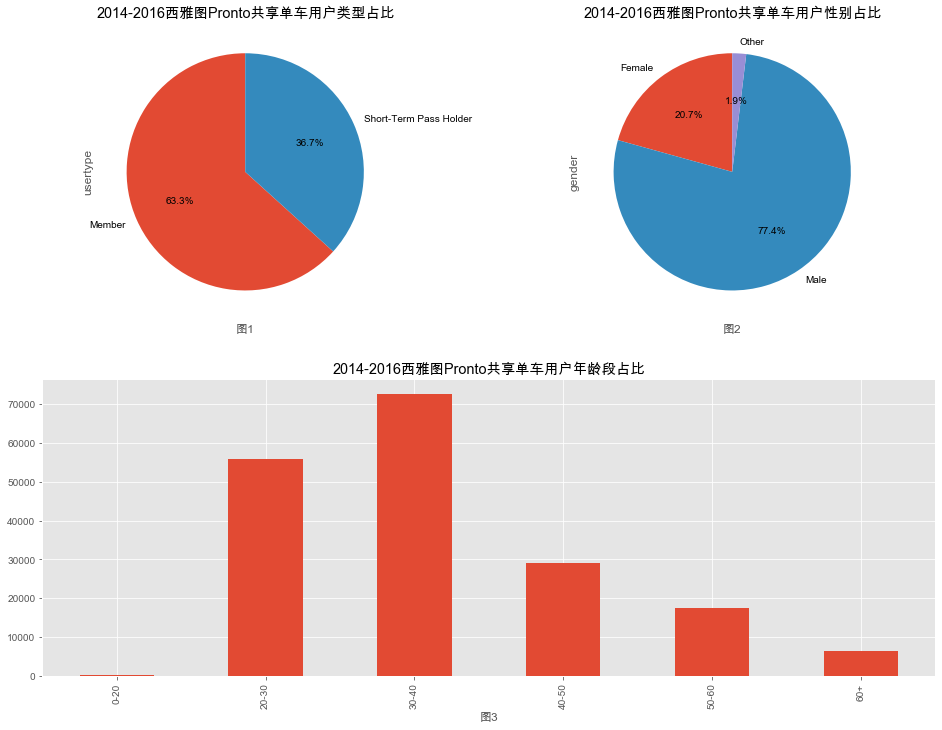

In [11]:
fig = plt.subplots(figsize=(16,12))

ax1 = plt.subplot2grid((2,2), (0,0),colspan=1)
df1 = trip.groupby(by = ['usertype']).usertype.count()
df1.plot.pie(startangle =90,autopct = '%.1f%%',ax =ax1)
ax1.set_title('2014-2016西雅图Pronto共享单车用户类型占比')
ax1.set_xlabel('图1')

ax2 = plt.subplot2grid((2,2), (0,1),colspan=2)
df2 = trip.groupby(by = ['gender']).gender.count()
df2.plot.pie(startangle =90,autopct = '%.1f%%',ax =ax2)
ax2.set_title('2014-2016西雅图Pronto共享单车用户性别占比')
ax2.set_xlabel('图2')

ax3 = plt.subplot2grid((2,2), (1,0),colspan=2)
df3 = groupby_age.groupby(by = ['age']).age.count()
df3.plot.bar(ax =ax3)
ax3.set_title('2014-2016西雅图Pronto共享单车用户年龄段占比')
ax3.set_xlabel('图3')

In [12]:
groupby_year_month_day_hour = trip.groupby(by = ['date','year','month','day','hour','weekday']).trip_id.count()
gg1 = groupby_year_month_day_hour.reset_index()
gg1.columns = ['date','year','month','day','hour','weekday','count']

def get_season(x):
    if 1 <= x <= 3:
        return 'Spi'
    elif 4 <= x <= 6:
        return 'Sum'
    elif 7 <= x <= 9:
        return 'Fall'
    else:
        return 'Win'
    
gg1['season'] = gg1.month.apply(get_season)
gg1.head()

,date,year,month,day,hour,weekday,count,season
0,2014-10-13,2014,10,13,10,0,12,Win
1,2014-10-13,2014,10,13,11,0,108,Win
2,2014-10-13,2014,10,13,12,0,84,Win
3,2014-10-13,2014,10,13,13,0,78,Win
4,2014-10-13,2014,10,13,14,0,112,Win


Text(0.5, 0, '图9')

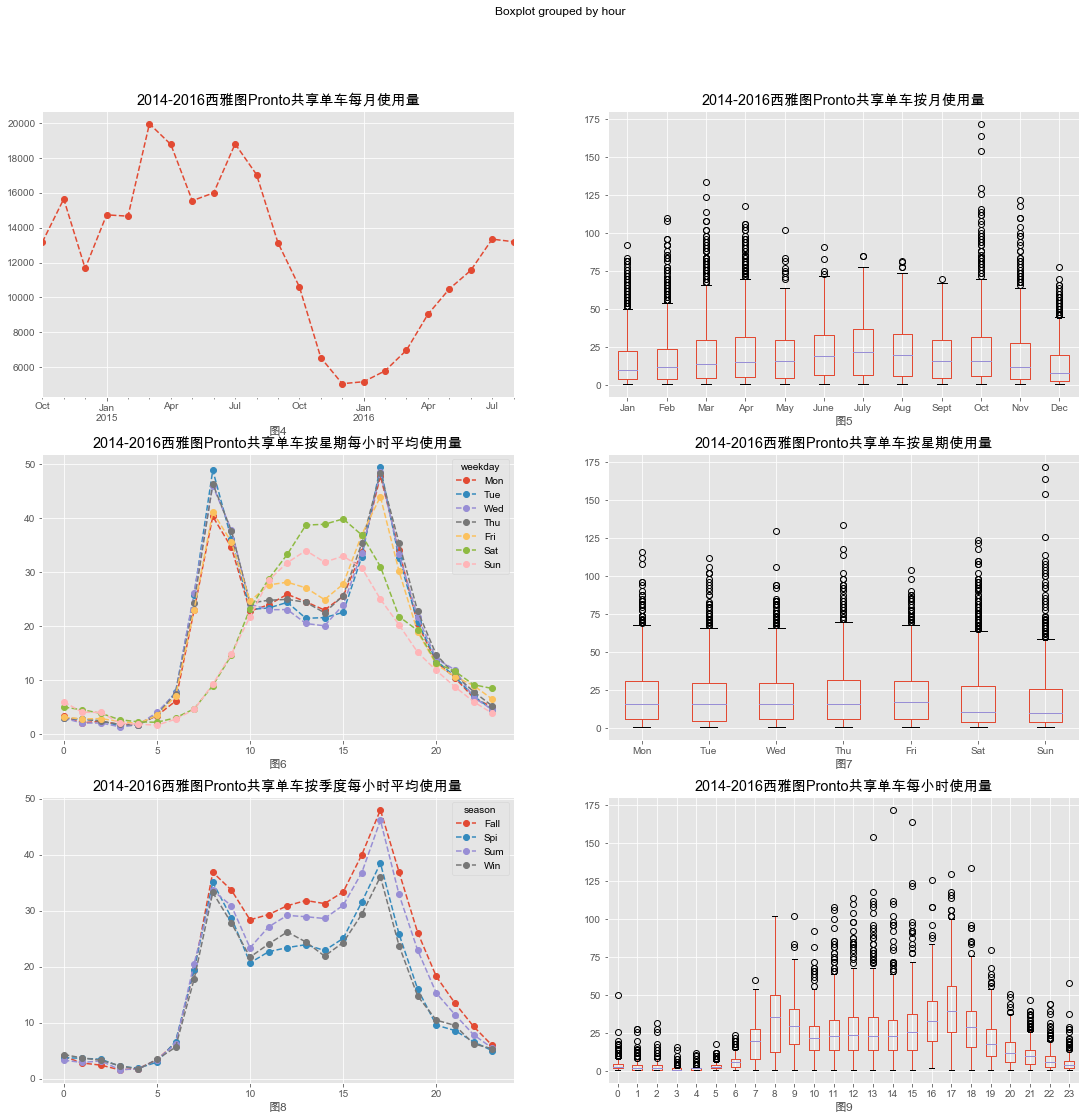

In [13]:
fig = plt.subplots(figsize=(18,18))

ax1 = plt.subplot2grid((3,2),(0,0))
gg1['year_month'] = gg1.date.astype('datetime64[M]')
df4 = gg1.groupby('year_month').sum()['count']
df4.plot( linestyle = 'dashed', marker = 'o', ax = ax1 )
ax1.set_title('2014-2016西雅图Pronto共享单车每月使用量')
ax1.set_xlabel('图4')

ax2 = plt.subplot2grid((3,2),(0,1))
df41 = gg1[['month','count']]
df41.boxplot( by='month', ax = ax2)
ax2.set_title('2014-2016西雅图Pronto共享单车按月使用量')
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'], rotation='horizontal')
ax2.set_xlabel('图5')

ax3 = plt.subplot2grid((3,2),(1,0))
df5 = gg1.groupby(['hour','weekday']).mean().unstack()['count']
df5.rename( columns = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}, inplace = True )
df5.plot(linestyle = 'dashed', marker = 'o', ax =ax3 )
ax3.set_title('2014-2016西雅图Pronto共享单车按星期每小时平均使用量')
ax3.set_xlabel('图6')

ax4 = plt.subplot2grid((3,2),(1,1))
df51 = gg1[['weekday','count']]
df51.boxplot( by='weekday', ax = ax4)
ax4.set_title('2014-2016西雅图Pronto共享单车按星期使用量')
ax4.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
ax4.set_xlabel('图7')

ax5 = plt.subplot2grid((3,2),(2,0))
df6 = gg1.groupby(by = ['hour','season']).mean().unstack()['count']
df6.plot( linestyle = 'dashed', marker='o', ax = ax5 )
ax5.set_title('2014-2016西雅图Pronto共享单车按季度每小时平均使用量')
ax5.set_xlabel('图8')

ax6 = plt.subplot2grid((3,2),(2,1))
df61 = gg1[['hour','count']]
df61.boxplot( by='hour', ax = ax6)
ax6.set_title('2014-2016西雅图Pronto共享单车每小时使用量')
ax6.set_xlabel('图9')

Text(0, 0.5, '数量')

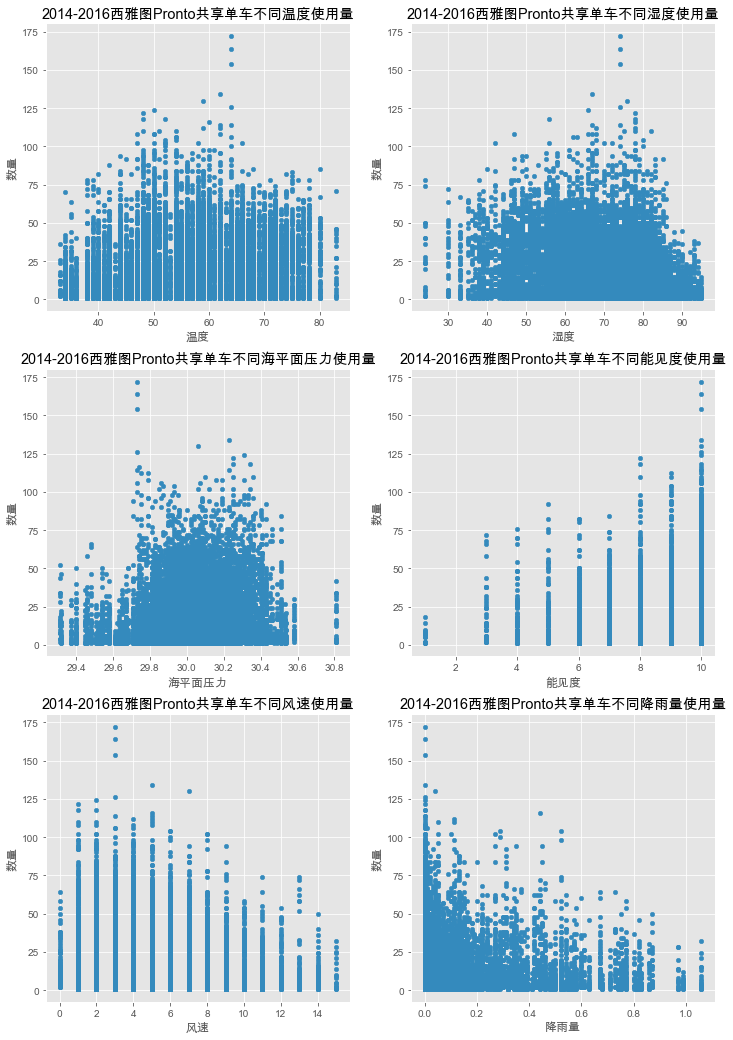

In [14]:
merged = gg1.merge(right=weather,how='inner',left_on='date',right_on='Date')

fig = plt.subplots(figsize=(12,18))

ax1 = plt.subplot2grid((3,2),(0,0))
merged.plot.scatter(x='Temperature',y='count',ax = ax1 )
ax1.set_title('2014-2016西雅图Pronto共享单车不同温度使用量')
ax1.set_xlabel('温度')
ax1.set_ylabel('数量')

ax2 = plt.subplot2grid((3,2),(0,1))
merged.plot.scatter(x='humidity',y='count',ax = ax2 )
ax2.set_title('2014-2016西雅图Pronto共享单车不同湿度使用量')
ax2.set_xlabel('湿度')
ax2.set_ylabel('数量')

ax3 = plt.subplot2grid((3,2),(1,0))
merged.plot.scatter(x='Sea_Pressure',y='count',ax = ax3 )
ax3.set_title('2014-2016西雅图Pronto共享单车不同海平面压力使用量')
ax3.set_xlabel('海平面压力')
ax3.set_ylabel('数量')

ax4 = plt.subplot2grid((3,2),(1,1))
merged.plot.scatter(x='Visibility_Miles',y='count',ax = ax4 )
ax4.set_title('2014-2016西雅图Pronto共享单车不同能见度使用量')
ax4.set_xlabel('能见度')
ax4.set_ylabel('数量')

ax5 = plt.subplot2grid((3,2),(2,0))
merged.query('Wind_Speed < 20').plot.scatter(x='Wind_Speed',y='count',ax = ax5 )
ax5.set_title('2014-2016西雅图Pronto共享单车不同风速使用量')
ax5.set_xlabel('风速')
ax5.set_ylabel('数量')

ax6 = plt.subplot2grid((3,2),(2,1))
merged.query("Precipitation_In < 1.25").plot.scatter(x='Precipitation_In',y='count',ax = ax6 )
ax6.set_title('2014-2016西雅图Pronto共享单车不同降雨量使用量')
ax6.set_xlabel('降雨量')
ax6.set_ylabel('数量')